# Analysis of US GDP and Unemployment

In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()

Loading BokehJS ...

In [15]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend_label="Current GDP Growth")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend_label="Unemployment Rate")
    show(p)

In [3]:
links={'GDP':'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/clean_gdp.csv',\
       'unemployment':'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/clean_unemployment.csv'}

In [4]:
GDP=pd.read_csv(links['GDP'])

In [5]:
GDP.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


In [6]:
Unemp = pd.read_csv(links['unemployment'])

In [7]:
Unemp.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


In [8]:
# Type your code here
HighUnemp = Unemp[Unemp['unemployment']>8.5]
HighUnemp

,date,unemployment
34,1982,9.708333
35,1983,9.600000
61,2009,9.283333
62,2010,9.608333
63,2011,8.933333


In [28]:
x_axis = GDP['date']# Create your dataframe with column date

In [10]:
gdp_change = GDP['change-current']# Create your dataframe with column change-current

In [11]:
unemployment = Unemp['unemployment']# Create your dataframe with column unemployment

In [12]:
title = 'Relationship of US GDP and Unemployment'

In [13]:
file_name = "index.html"

In [61]:
make_dashboard(x=x_axis, gdp_change=gdp_change, unemployment=unemployment, title=title, file_name=file_name)

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [94]:
CombinedData = pd.merge(GDP,Unemp,on='date')
CombinedData.head()

,date,level-current,level-chained,change-current,change-chained,unemployment
0,1948,274.8,2020.0,-0.7,-0.6,3.750000
1,1949,272.8,2008.9,10.0,8.7,6.050000
2,1950,300.2,2184.0,15.7,8.0,5.208333
3,1951,347.3,2360.0,5.9,4.1,3.283333
4,1952,367.7,2456.1,6.0,4.7,3.025000


Text(0, 0.5, 'Unemployment Rate')

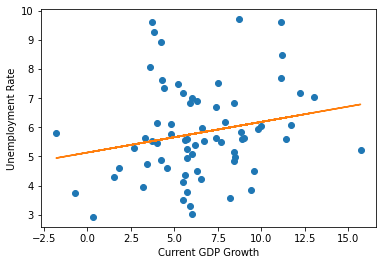

In [118]:
#Scatter plot and regression line for relationship between GDP and unemployment
plt.plot(CombinedData['change-current'],CombinedData['unemployment'], 'o')
m, b = np.polyfit(CombinedData['change-current'],CombinedData['unemployment'], 1)
plt.plot(x, m*x + b)
plt.xlabel("Current GDP Growth")
plt.ylabel("Unemployment Rate")

In [120]:
#Calculate a Z-score to detect outliers and remove those with Z-score under 1.5
z = np.abs(stats.zscore(CombinedData))
CombinedData_o = CombinedData[(z < 1.5).all(axis=1)]
print('Original dataframe shape:',CombinedData.shape)
print('Dataframe shape without outliers:',CombinedData_o.shape)

Original dataframe shape: (69, 6)
Dataframe shape without outliers: (41, 6)


Text(0, 0.5, 'Unemployment Rate')

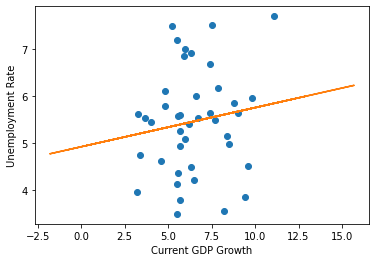

In [121]:
#Scatter plot and regression line for relationship between GDP and unemployment (without outliers)
plt.plot(CombinedData_o['change-current'],CombinedData_o['unemployment'], 'o')
m, b = np.polyfit(CombinedData_o['change-current'],CombinedData_o['unemployment'], 1)
plt.plot(x, m*x + b)
plt.xlabel("Current GDP Growth")
plt.ylabel("Unemployment Rate")